## Zomato Data Analysis Project

### Step 1 - Importing libraries

In [1]:
import pandas as pd  # pandas is used for data manipulation and analysis
import numpy as np # numpy is used for numerical operations
import matplotlib.pyplot as plt
import seaborn as sns # matplotlib and seaborn are used for data visualization

### Step 2 - Creating the dataframe

In [2]:
df=pd.read_csv('Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#### Converting the data type of column rate 

In [3]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Type of Restaurant

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

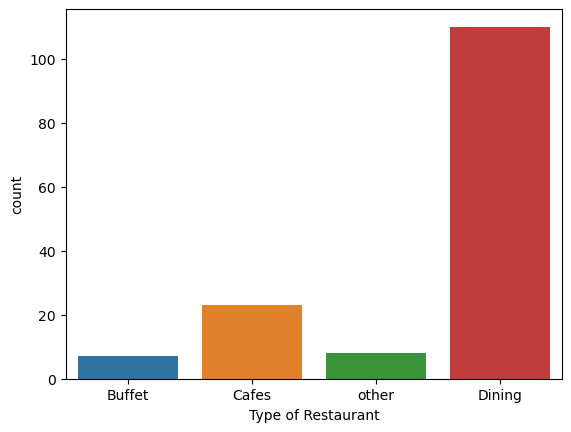

In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

##### Conclusion - Majority of the restaurant falls in the dining category

Text(0, 0.5, 'Votes')

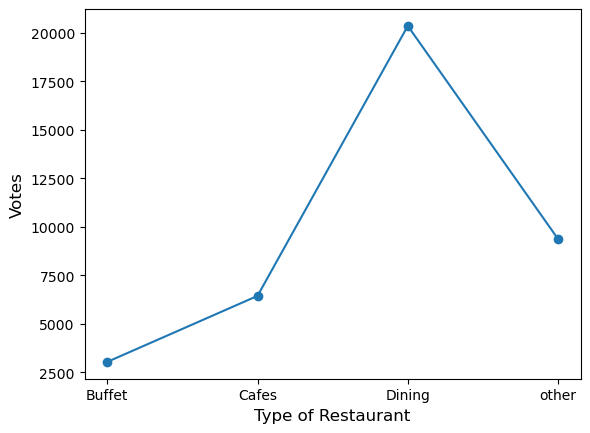

In [7]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,marker="o")
plt.xlabel("Type of Restaurant",size=12) # to give color on label we can use c="red"
plt.ylabel("Votes",size=12)

##### Conclusion - Dining restaurants has received the maximum number of votes

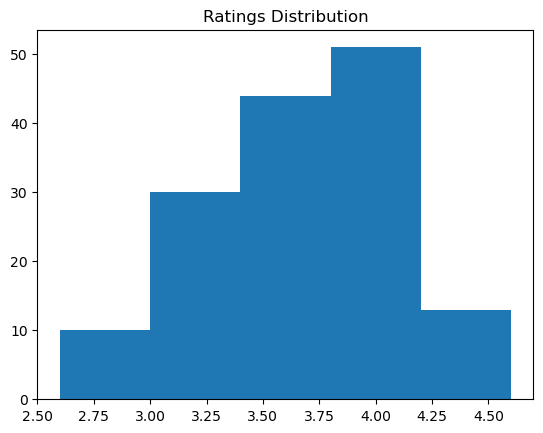

In [8]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

##### Conclusion - Majority of the restaurants received ratings from 3.5 to 4

#### Average cost spent by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

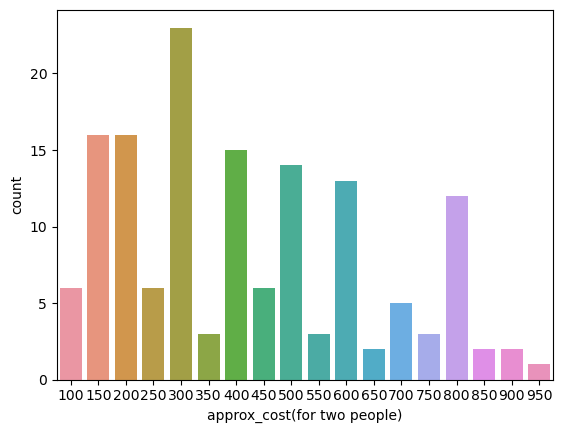

In [9]:
couple_data=df['approx_cost(for two people)']
# ordered_data = couple_data.value_counts().sort_values(ascending=False).index
# couple_data = pd.Categorical(couple_data, categories=ordered_data, ordered=True)
sns.countplot(x=couple_data)

##### Conclusion - The majority of couples prefer restaurants with an approximate cost of 300 rupees

#### Which mode received the maximum rating ?

<Axes: xlabel='online_order', ylabel='rate'>

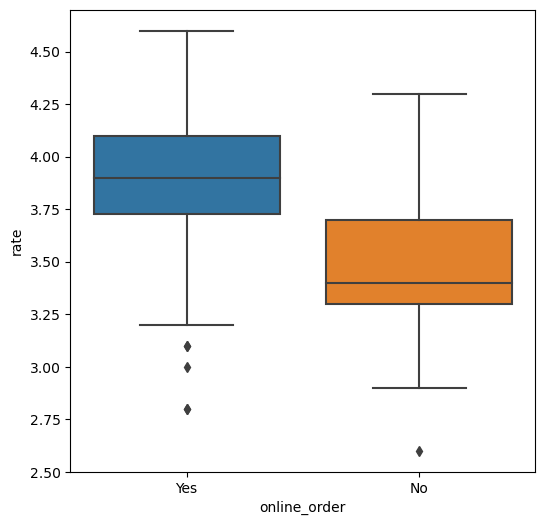

In [10]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

##### Conclusion - Offline orders received lower rating in comparison to online orders

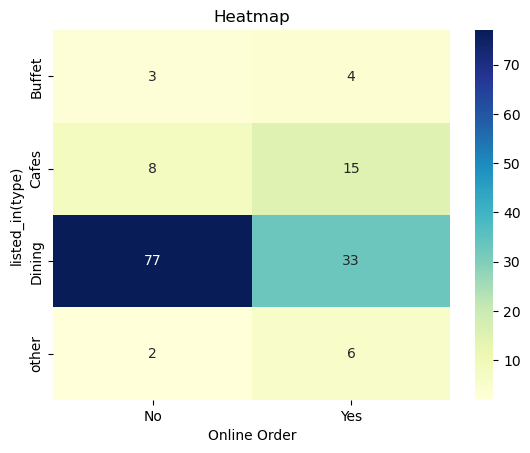

In [11]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('listed_in(type)')
plt.show()

##### Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to order in person at restaurants, but prefer online ordering at cafes.